<a href="https://colab.research.google.com/github/SasidharaSrivatchasa/Indian-Sign-Language-Recognition/blob/main/PRAICP_1000_IndiSignLang_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing all the required libraries for the project(tensorflow,keras from tensorflow, layers from tensorflow,os, cv2, matplotlib.pyplot,numpy and from tensorflow.keras.preprocessing.image we import ImageDataGenerator )
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# setting up the dataset path from google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
DATASET_PATH = "/content/drive/MyDrive/MY PROJECTS ON MACHINE LEARNING AND AI/INTERNSHIP PROJECTS /CAPSTONE PROJECTS/PROJECT 1 (PRAICP-1000-IndiSignLang )/DATA SET/PRAICP-1000-IndiSignLang/Data"
print(os.listdir(DATASET_PATH))

['S', 'Y', 'W', 'Q', 'P', 'X', 'U', 'V', 'T', 'R', 'N', 'G', 'M', 'O', 'L', 'I', 'H', 'K', 'E', 'F', 'C', 'B', 'A', 'D']


In [4]:
# Image Preprocessing & Augmentation
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

In [5]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% Train, 20% Validation
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 3987 images belonging to 24 classes.
Found 985 images belonging to 24 classes.


In [6]:
# Define CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_data.class_indices), activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train Model
EPOCHS = 10
history = model.fit(train_data, validation_data=val_data, epochs=EPOCHS)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1575s 13s/step - accuracy: 0.0696 - loss: 3.0999 - val_accuracy: 0.3036 - val_loss: 2.3871
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.3391 - loss: 2.0956 - val_accuracy: 0.4944 - val_loss: 1.7263
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.5582 - loss: 1.3139 - val_accuracy: 0.6244 - val_loss: 1.2016
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.6832 - loss: 0.9438 - val_accuracy: 0.7076 - val_loss: 0.9117
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7677 - loss: 0.6777

In [9]:
# Save Model
model.save('/content/drive/MyDrive/MY PROJECTS ON MACHINE LEARNING AND AI/INTERNSHIP PROJECTS/CAPSTONE PROJECTS/PROJECT 1 (PRAICP-1000-IndiSignLang)/ISL_Model.h5')


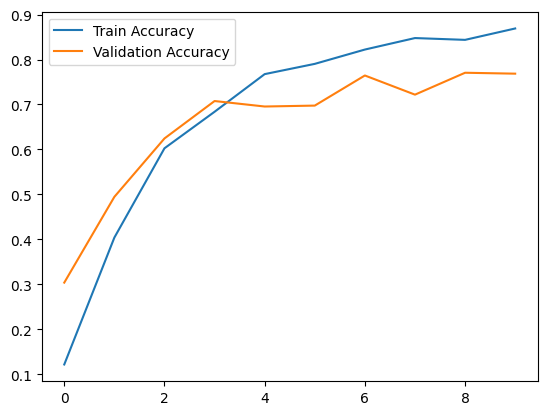

In [10]:
# Evaluate Model
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [11]:
# Load and Test Model on New Image
def predict_sign(image_path, model):
    img = cv2.imread(image_path)
    img = cv2.resize(img, IMG_SIZE)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    class_index = np.argmax(prediction)
    class_name = list(train_data.class_indices.keys())[class_index]
    return class_name

In [13]:
# Example Usage
# result = predict_sign('/path/to/test/image.jpg', model)
# print("Predicted Sign:", result)
